In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv('sentiment_data.csv', encoding='unicode_escape')
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [3]:
df['sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [4]:
df['sentiment'].value_counts()

sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64

In [5]:
df.shape

(27481, 10)

In [6]:
df.isna().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(27480, 10)

In [9]:
df.isna().sum()

textID              0
text                0
selected_text       0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [10]:
df['selected_text'][4231]

"'I`m giving up on you. I don`t care how you mess up your life now.'"

In [11]:
df['text'][4231]

"'I`m giving up on you. I don`t care how you mess up your life now.'... :`("

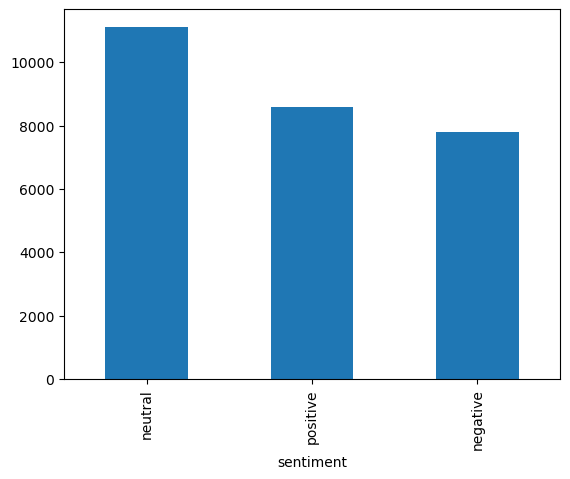

In [12]:
df.sentiment.value_counts().plot(kind='bar')
plt.show()

In [13]:
data = df[['text','selected_text','sentiment']]
data.head()

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [14]:
def mapping(x):
    map = {
        'neutral':0,
        'positive':1,
        'negative':2
    }
    return map.get(x)

In [15]:
data['sentiment'] = data['sentiment'].apply(mapping)

C:\Users\Mousumi Sarkar\AppData\Local\Temp\ipykernel_3488\1193321525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['sentiment'].apply(mapping)


In [16]:
data.head()

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",0
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,2
2,my boss is bullying me...,bullying me,2
3,what interview! leave me alone,leave me alone,2
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",2


In [17]:
data['sentiment'].unique()

array([0, 2, 1], dtype=int64)

In [18]:
total_word_count = 0
for content in data['text']:
    total_word_count += sum(1 for _ in content.split())
print(total_word_count)

354571


In [19]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
ps = PorterStemmer()

In [21]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = " ".join(stemmed_content)
    return stemmed_content

In [22]:
data['text'] = data['text'].apply(stemming)

C:\Users\Mousumi Sarkar\AppData\Local\Temp\ipykernel_3488\725934016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(stemming)


In [23]:
data.head()

,text,selected_text,sentiment
0,respond go,"I`d have responded, if I were going",0
1,sooo sad miss san diego,Sooo SAD,2
2,boss bulli,bullying me,2
3,interview leav alon,leave me alone,2
4,son put releas alreadi bought,"Sons of ****,",2


In [24]:
data = data.drop('selected_text', axis=1)
data.head()

,text,sentiment
0,respond go,0
1,sooo sad miss san diego,2
2,boss bulli,2
3,interview leav alon,2
4,son put releas alreadi bought,2


In [25]:
total_word_count = 0
for content in data['text']:
    total_word_count += sum(1 for _ in content.split())
print(total_word_count)

196944


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.svm import SVC

In [27]:
X = data['text']
Y = data['sentiment']

In [28]:
X_train , X_test , Y_train , Y_test  = train_test_split(X, Y, test_size = 0.2 , stratify = Y , random_state = 42)

In [29]:
vc = TfidfVectorizer()
X_train = vc.fit_transform(X_train)
X_test = vc.transform(X_test)

In [30]:
model = SVC()
model.fit(X_train, Y_train)

# Make predictions
Y_pred_cls = model.predict(X_test)

accuracy_cls = accuracy_score(Y_test, Y_pred_cls)

f1_cls = f1_score(Y_test, Y_pred_cls, average='weighted')

report_cls = classification_report(Y_test, Y_pred_cls)
    
# Print the results for classification
print(f"Model: SVM")
print(f"Accuracy: {accuracy_cls:.4f}")
print(f"F1-Score: {f1_cls:.4f}")
print(f"Classification Report:\n{report_cls}")


Model: SVM
Accuracy: 0.7007
F1-Score: 0.6996
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.81      0.70      2223
           1       0.80      0.68      0.74      1717
           2       0.77      0.57      0.65      1556

    accuracy                           0.70      5496
   macro avg       0.73      0.69      0.70      5496
weighted avg       0.72      0.70      0.70      5496



In [31]:
def val_to_category(val):
    category_map = {
       0:'neutral',
        1:'positive',
        2:'negative'
     }
    return category_map.get(val,-1)

In [32]:
def make_predictions(text):
    text = stemming(text)
    text = vc.transform([text])
    val = model.predict(text)
    val = val_to_category(int(val[0]))
    print("sentiment is : ",val)

In [33]:
make_predictions('He hate the guy.')

sentiment is :  negative


In [34]:
make_predictions('i like to stay here.')

sentiment is :  neutral


In [35]:
make_predictions('i am proud of you')

sentiment is :  positive
